#**0) Settings**

In order to work, you should use [pyqsp](https://github.com/ichuang/pyqsp).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append(<pyqsp path>)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install cirq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.6/594.6 KB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 KB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.4/221.4 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.4/147.4 KB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 KB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 

In [ ]:
from pyqsp.poly import *
from pyqsp.response import *
from pyqsp.angle_sequence import *
from pyqsp.phases import * 

#**1) Analysis**

In [ ]:
def nearestOdd(num):
  num = int(num)
  if num % 2 == 0:
      return num + 1
  else:
      return num

In [ ]:
def GroverComplexityTheory(nLogQubits):
  N = 2**nLogQubits
  d = np.pi/(2*np.arcsin(1/(np.sqrt(N))))
  return nearestOdd(d)

In [ ]:
def rGrover(nLogQubits):
  N = 2**nLogQubits
  r = np.pi/(4*np.arcsin(1/(np.sqrt(N)))) - (1/2)
  return r

In [ ]:
2*rGrover(5) + 1

8.839069359536772

In [ ]:
GroverComplexityTheory(5)

9

In [ ]:
def CorrectingPhasesW(phiset):
  d = len(phiset) - 1
  Correct_phiset = np.zeros(d+1)

  Correct_phiset[d] = (np.pi/4)
  Correct_phiset[0] = phiset[1] - (d*np.pi/2) +(np.pi/4)
  for k in range(1,d):
    Correct_phiset[k] = phiset[k+1] + np.pi/2

  return list(Correct_phiset)

In [ ]:
def coefGrover(d):
  coeffs=[]
  coeffs.append(0)
  for i in range(1,d+1):
    if i == 1:
      #coeffs.append(np.pi/4*(d-1))
      coeffs.append(0)
    else:
      coeffs.append(np.pi/2)
  return list(coeffs)

In [ ]:
def  GroverComplexity(n, end=35001, threshold=0.90):
  a = 1/(np.sqrt(2**n))
  if end%2 == 1:
    for d in range(3,end,2):
      if np.abs(QSPreponse([a], CorrectingPhasesW(coefGrover(d)), signal_operator="Wx", measurement = "z")['pdat'][0])**2  >= threshold:
        return d 

In [ ]:
def coefChebyshev(d):
  coeffs = []
  for i in range(0,d+1):
    if i == d:
      coeffs.append(1)
    else:
      coeffs.append(0)
  return coeffs

In [ ]:
def GroverProbability(n):
  N = 2**n
  a = 1/(np.sqrt(N))
  d = GroverComplexityTheory(n)
  r = (d - 1)/2
  theta = 2*np.arcsin(a)
  angle = (r*theta)+ (theta/2)
  p = (np.sin(angle))**2
  
  return r,d,a,p

In [ ]:
n = 11
for i in range(2,n,1):
  r,d,a,p = GroverProbability(i)
  print(str(i) + " qubits:    " + "r="+ str(r)+ "   degree="+ str(d) + "   P(a)="+ str(round(np.abs(np.polynomial.Chebyshev(coefChebyshev(d))(a))**2,4)) + "   p(w)="+ str(round(p,4))) 

2 qubits:    r=1.0   degree=3   P(a)=1.0   p(w)=1.0
3 qubits:    r=2.0   degree=5   P(a)=0.9453   p(w)=0.9453
4 qubits:    r=3.0   degree=7   P(a)=0.9613   p(w)=0.9613
5 qubits:    r=4.0   degree=9   P(a)=0.9992   p(w)=0.9992
6 qubits:    r=6.0   degree=13   P(a)=0.9966   p(w)=0.9966
7 qubits:    r=8.0   degree=17   P(a)=0.9956   p(w)=0.9956
8 qubits:    r=12.0   degree=25   P(a)=0.9999   p(w)=0.9999
9 qubits:    r=17.0   degree=35   P(a)=0.9994   p(w)=0.9994
10 qubits:    r=25.0   degree=51   P(a)=0.9995   p(w)=0.9995


In [ ]:
GroverProbability(4)

0.9613189697265625

In [ ]:
(np.polynomial.Chebyshev(coefChebyshev(7))(0.25))**2

0.9613189697265625

In [ ]:
def ChebyshevComplexity1(n, end=35001, threshold=0.99):
  a = 1/(np.sqrt(2**n))
  if end%2 == 1:
    for d in range(3,end,2):
      if (np.abs(np.polynomial.Chebyshev(coefChebyshev(d))(a)))**2 >= threshold:
        return d 

In [ ]:
def ChebyshevComplexity2(n, end=35001, threshold=0.95):
  a = 1/(np.sqrt(2**n))
  if end%2 == 1:
    for d in range(3,end,2):
      if (np.abs(np.polynomial.Chebyshev(coefChebyshev(d))(a)))**2 >= threshold:
        return d 

In [ ]:
def ChebyshevComplexity3(n, end=35001, threshold=0.90):
  a = 1/(np.sqrt(2**n))
  if end%2 == 1:
    for d in range(3,end,2):
      if (np.abs(np.polynomial.Chebyshev(coefChebyshev(d))(a)))**2 >= threshold:
        return d 

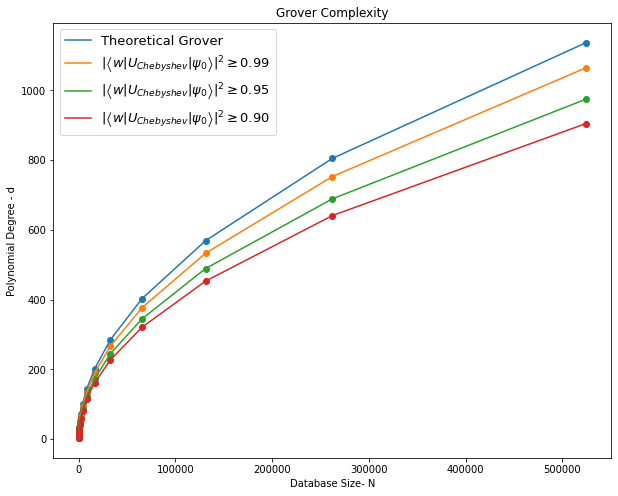

In [ ]:
x = list(range(2,20,1))

N = list(map(lambda n: 2**n  ,x))
y_Grover1 = list(map(GroverComplexityTheory, x))
y_Cheb1 = list(map(ChebyshevComplexity1, x))
y_Cheb2 = list(map(ChebyshevComplexity2, x))
y_Cheb3 = list(map(ChebyshevComplexity3, x))

plt.figure(figsize=(10,8))
plt.ylabel("Polynomial Degree - d")
plt.xlabel("Database Size- N")
plt.title("Grover Complexity")
plt.plot(N, y_Grover1, label = 'Theoretical Grover')
plt.scatter(N, y_Grover1)
plt.plot(N, y_Cheb1, label = r'$|\left\langle  w | U_{Chebyshev}| \psi_0 \right\rangle|^2 \geq 0.99$ ')
plt.scatter(N, y_Cheb1)
plt.plot(N, y_Cheb2, label = r'$|\left\langle  w | U_{Chebyshev}| \psi_0 \right\rangle|^2\geq 0.95$ ')
plt.scatter(N, y_Cheb2)
plt.plot(N, y_Cheb3, label = r'$|\left\langle  w | U_{Chebyshev}| \psi_0 \right\rangle|^2\geq 0.90$ ')
plt.scatter(N, y_Cheb3)

plt.legend(loc=2, prop={'size': 13})
plt.show()

In [ ]:
phisetGrover = CorrectingPhasesW([ 0, 3*np.pi/2, np.pi/2, np.pi/2, np.pi/2, np.pi/2, np.pi/2, np.pi/2])

In [ ]:
phisetGrover

[-5.497787143782138,
 3.141592653589793,
 3.141592653589793,
 3.141592653589793,
 3.141592653589793,
 3.141592653589793,
 3.141592653589793,
 0.7853981633974483]

In [ ]:
coefGrover(d)

[-7.0685834705770345,
 3.141592653589793,
 3.141592653589793,
 3.141592653589793,
 2.356194490192345]

In [ ]:
coefGrover(d)

[-5.497787143782138,
 3.141592653589793,
 3.141592653589793,
 3.141592653589793,
 3.141592653589793,
 3.141592653589793,
 3.141592653589793,
 0.7853981633974483]

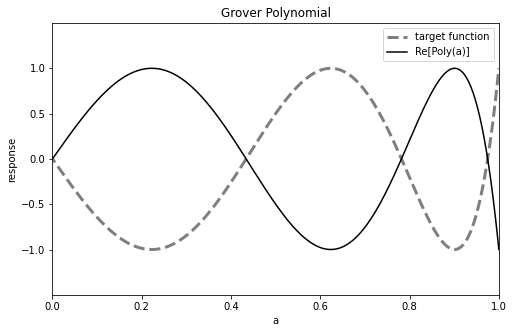

In [ ]:
d = 7
poly = np.polynomial.Chebyshev(coefChebyshev(d))
PlotQSPResponse(CorrectingPhasesW(coefGrover(d)),  target = poly ,signal_operator="Wx", measurement="z", title= 'Grover Polynomial', plot_real_only=True, plot_positive_only=True, plot_probability=False)

In [ ]:
poly = PolySign()
pcoefs, scale = poly.generate(degree=33, delta=1000, ensure_bounded=True, return_scale=True)

[pyqsp.poly.PolySign] degree=33, delta=1000
[PolyTaylorSeries] max [0.84461593] is at [0.12685537]: normalizing
[PolyTaylorSeries] average error = 0.18459669482011226 in the domain [-1, 1] using degree 33


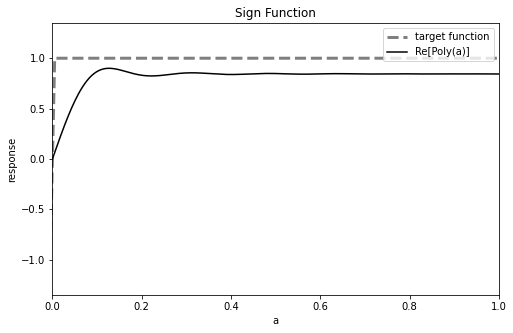

In [ ]:
ang_seq = QuantumSignalProcessingPhases(pcoefs, method = 'laurent')
PlotQSPResponse(ang_seq, target=lambda x: np.sign(x), signal_operator="Wx", title="Sign Function", plot_real_only=True, plot_positive_only=True)

In [ ]:
d = 19
poly = StringPolynomial("np.sign(x)",d)
phisetSign = QuantumSignalProcessingPhases(poly, method='tf')

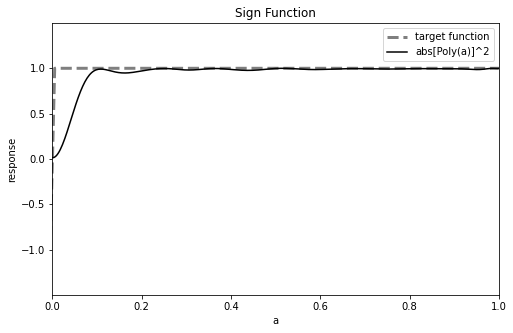

In [ ]:
PlotQSPResponse(phisetSign, target=poly, signal_operator="Wx", title= 'Sign Function', plot_probability=True, plot_positive_only=True)

In [ ]:
x = ComputeQSPResponse([1/np.sqrt(2**7)], phisetSign, signal_operator="Wx")['pdat'][0]
print(float(np.abs(x)**2))

0.9546290337603072


In [ ]:
pcoefs

array([ 0.00000000e+00,  7.64225712e+00,  0.00000000e+00, -1.02151883e+02,
        0.00000000e+00,  8.52742367e+02,  0.00000000e+00, -4.15999687e+03,
        0.00000000e+00,  1.24985059e+04,  0.00000000e+00, -2.38451097e+04,
        0.00000000e+00,  2.89669725e+04,  0.00000000e+00, -2.17050433e+04,
        0.00000000e+00,  9.14490737e+03,  0.00000000e+00, -1.65756889e+03])

In [ ]:
pcoefs = pcoefs/scale

In [ ]:
np.abs(pol.polyval(0.25,pcoefs))**2

1.3352882505340822

In [ ]:
d = 15
poly = StringPolynomial("np.sin(np.sqrt(2**6)*np.pi*x/2)",d)
phisetSin= QuantumSignalProcessingPhases(poly, method='tf')

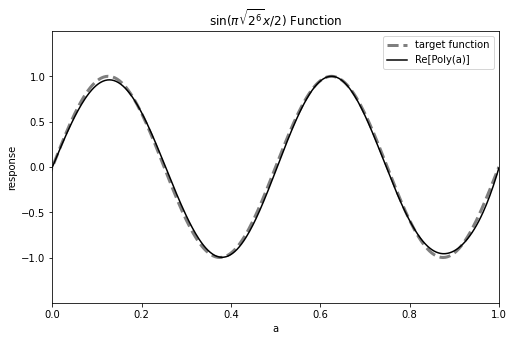

In [ ]:
PlotQSPResponse(phisetSin, target=poly, signal_operator="Wx", title= 'sin($\pi\sqrt{2^6}x/2$) Function', plot_real_only=True, plot_positive_only=True)

In [ ]:
x = ComputeQSPResponse([1/np.sqrt(2**6)], phisetSin, signal_operator="Wx")['pdat'][0]
print(float(np.abs(x)**2))

0.9222661252678999


/content/drive/MyDrive/Telecom/PRIM/master/pyqsp/response.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  def qsp_op(phi): return np.array(


/content/drive/MyDrive/Telecom/PRIM/master/pyqsp/response.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  def qsp_op(phi): return np.array(


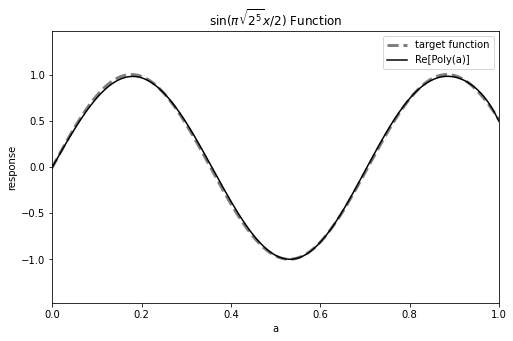

In [ ]:
PlotQSPResponse(phisetSin, target=poly, signal_operator="Wx", title= 'sin($\pi\sqrt{2^5}x/2$) Function', plot_real_only=True, plot_positive_only=True)

In [ ]:
x = ComputeQSPResponse([1/np.sqrt(2**5)], phisetSin, signal_operator="Wx")['pdat'][0]
print(float(np.abs(x)**2))

0.9587821597320554


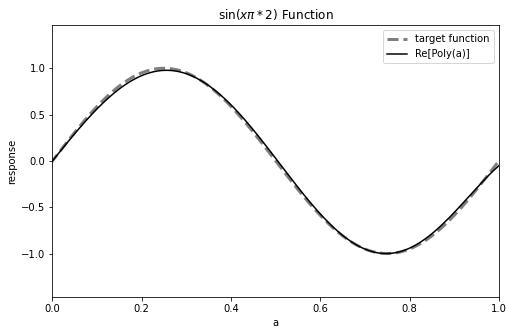

In [ ]:
PlotQSPResponse(phisetSin, target=poly, signal_operator="Wx", title= 'sin($x\pi*2$) Function', plot_real_only=True, plot_positive_only=True)

/content/drive/MyDrive/Telecom/PRIM/master/pyqsp/response.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  def qsp_op(phi): return np.array(


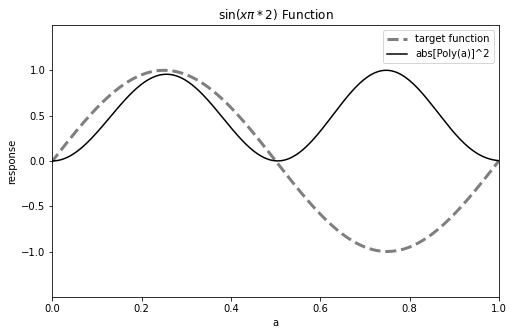

In [ ]:
PlotQSPResponse(phisetSin, target=poly, signal_operator="Wx", title= 'sin($x\pi*2$) Function', plot_probability=True, plot_positive_only=True)

In [ ]:
d = 9
poly = StringPolynomial("np.sin(np.sqrt(2**4)*np.pi*(x-0.10)/2)",d)
phisetSin= QuantumSignalProcessingPhases(poly, method='tf')

In [ ]:
x = ComputeQSPResponse([0.25], phisetSin, signal_operator="Wx")['pdat'][0]
print(float(np.abs(x)**2))

[0.95513263]
0.9551326345030208


In [ ]:
fp = FPSearch()
phisetFp = fp.generate(d=3, delta=0.001)

x = ComputeQSPResponse([0.], phisetFp, signal_operator="Wx")['pdat'][0]
print(float(np.abs(x)**2))

[pyqsp.fixed_point_search] generating length 6 sequence in the Wx convention
[phi_fp]: gamma=0.6061426765769182
0.9999999999999991


In [ ]:
phisetFp

array([-1.93658244, -0.78672753, -2.86213222, -2.86213222, -0.78672753,
       -1.93658244])

In [ ]:
def CorrectingPhasesRef(phiset):
  d = len(phiset) - 1
  Correct_phiset = np.zeros(d+1)

  Correct_phiset[0] = 0
  Correct_phiset[1] = phiset[0] + phiset[d] + (d-1)*(np.pi/2)
  for k in range(2,d+1):
    Correct_phiset[k] = phiset[k-1] - (np.pi/2)

  return Correct_phiset

In [ ]:
CorrectingPhasesRef(phisetFp)

array([ 0.        ,  2.41002043, -2.35752386, -4.43292855, -4.43292855,
       -2.35752386])

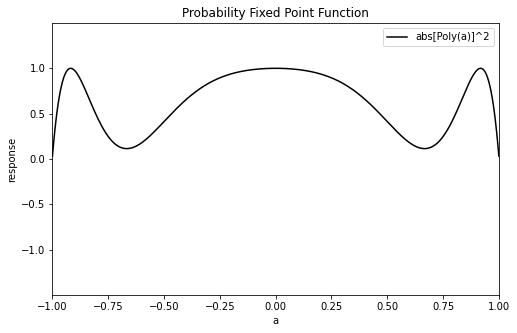

In [ ]:
PlotQSPResponse(phisetFp, signal_operator="Wx", measurement="x", title= 'Probability Fixed Point Function', plot_tight_y=False ,plot_probability=True, plot_positive_only=False)

In [ ]:
def phisetChebyshev(d):
  phiset = []
  phiset.append(0)
  phiset.append((1-d)*(np.pi/2))
  for i in range(1,d):
    phiset.append(np.pi/2)
  
  return phiset

In [ ]:
n = 30
for i in range(2,n,1):
  d = GroverComplexityTheory(i)
  print(str(i) + " qubits:    " + "r="+ str(round(rGrover(i),2))+ "   degree="+ str(d) + "   P(a)="+ str(np.abs(QSPreponse([1/(np.sqrt(2**i))], coefGrover(d), signal_operator="Rx", measurement = "x")['pdat'][0])**2))


oi
2 qubits:    r=1.0   degree=3   P(a)=0.9999999999999993
oi
3 qubits:    r=1.67   degree=5   P(a)=0.2187499999999999
oi
4 qubits:    r=2.61   degree=7   P(a)=0.9613189697265629
oi
5 qubits:    r=3.92   degree=9   P(a)=0.10306346416473386
oi
6 qubits:    r=5.77   degree=13   P(a)=0.03648451838078879
oi
7 qubits:    r=8.37   degree=17   P(a)=0.05800738666177555
oi
8 qubits:    r=12.06   degree=25   P(a)=0.017416788645253947
oi
9 qubits:    r=17.27   degree=35   P(a)=0.9994480261540106
oi
10 qubits:    r=24.63   degree=51   P(a)=0.9994612447444099
oi
11 qubits:    r=35.04   degree=71   P(a)=0.9999968477766253
oi
12 qubits:    r=49.76   degree=101   P(a)=0.0005691141744874379
oi
13 qubits:    r=70.58   degree=143   P(a)=0.999915775249421
oi
14 qubits:    r=100.03   degree=201   P(a)=0.0002589626544869917
oi
15 qubits:    r=141.67   degree=285   P(a)=5.5047613272610216e-05
oi
16 qubits:    r=200.56   degree=403   P(a)=0.9999882596461661
oi
17 qubits:    r=283.84   degree=569   P(a)=2.1746

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


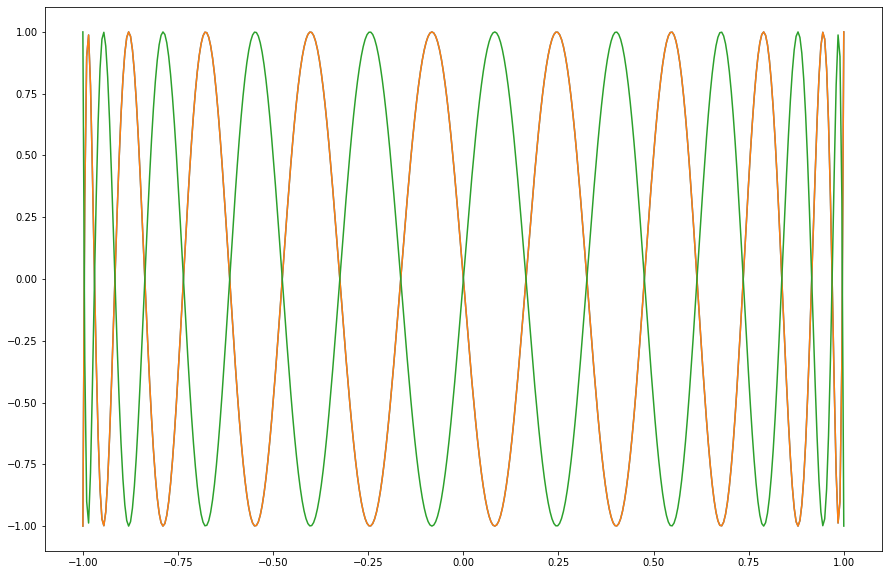

In [ ]:
d = 19

a = np.linspace(-1., 1., 400) 
plt.figure(figsize=(15,10))
plt.plot(a, QSPreponse(a, CorrectingPhasesW(phisetChebyshev(d)), signal_operator="Wx", measurement = "x")['pdat'])
plt.plot(a, np.polynomial.Chebyshev(coefChebyshev(d))(a))
plt.plot(a, np.imag(QSPreponse(a, CorrectingPhasesW(coefGrover(d)), signal_operator="Wx", measurement = "z")['pdat']))
plt.show()